In [2]:
from matplotlib import pyplot as plt
import numpy as np

The period for x= 7 and N= 15  is:  4


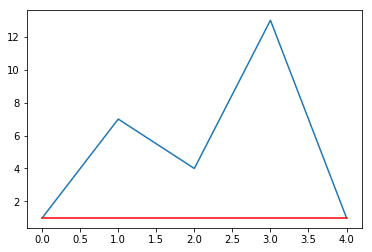

In [18]:
N = 5*3
x = 7

#returns period and x^r mod N across period
def period_finding(N, x):
    
    r=0
    rs=[]
    period=0
    period_found = False
    modular_exp=[]
    
    e = (x**r)%N
    modular_exp.append(e)
    rs.append(r)
    
    while not period_found:
        
        r+=1
        e = (x**r)%N
        modular_exp.append(e)
        rs.append(r)
        if e==1:
            period_found = True
            period = r
        
        
    return period, rs, modular_exp
        
period, rs, e = period_finding(N,x)
print("The period for x=",x ,"and N=", N, " is: ", period)
plt.plot(rs, e)
plt.plot(rs, np.ones(len(rs)), color="red")

